In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from seaborn import plt
import seaborn as sns
import matplotlib as mpl
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 10)

In [4]:
import psycopg2
db = psycopg2.connect(
        host = 'ga-analytics-2015.cbh1q304oyvf.us-west-2.rds.amazonaws.com',
        database = 'analytics2015',
        user = 'ostegmaier',
        password = '*******')

In [5]:
#Query to simulate some data (mocking up data using a film db stored on a public AWS postgres server)
query = '''SELECT 
                fa.actor_id as bid_request_id,
                f.film_id as request_id
            FROM public.film_actor fa 
            LEFT JOIN public.film2 f on f.film_id = fa.film_id '''

df = pd.read_sql(query, db)
#Add a column of 1's so we can use that to aggregate later
df['count_bids'] = 1

In [6]:
#Quick look at our data
df.head()

,bid_request_id,request_id,count_bids
0,1,23,1
1,1,25,1
2,1,106,1
3,1,140,1
4,1,166,1


In [7]:
#First get a count of the number of bids for each unique request
df2 = pd.pivot_table(df, index=['request_id'], values=['count_bids'], aggfunc=np.sum)
df2.head()

,count_bids
request_id,
1,9
2,4
3,5
4,5
5,5


In [8]:
#Then pull out the "value_counts" - basically builds the data we would need to do a histogram
df3 = pd.DataFrame(df2.count_bids.value_counts(), columns=['Count'])
df3.index.name = 'Bids Per Request'
#Let's look at the top fifteen categories
df3.head(15)

,Count
Bids Per Request,
5,195
6,150
4,137
3,119
7,118
8,90
2,69
9,50
1,21


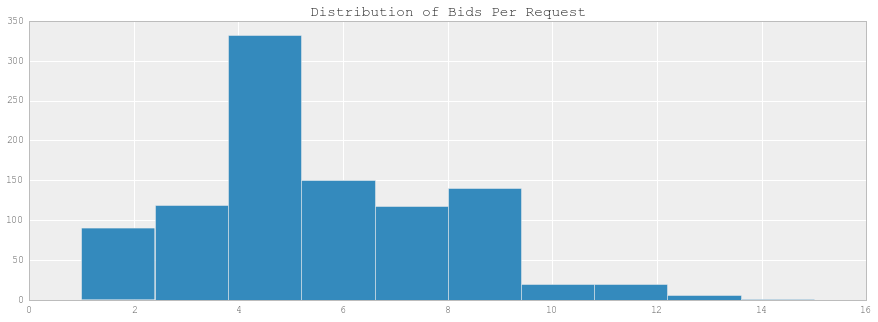

In [9]:
df2.count_bids.hist()
#We can also show this visually with a histogram
_title = plt.title("Distribution of Bids Per Request")